<a href="https://colab.research.google.com/github/mc-ivan/zero-shot/blob/main/lab4/notebooks/Practica4_Grupo3_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 4: Modelado Generativo de Espacios Habitacionales

**CASO: GAN usando LSUN Bedrooms**

**Grupo 3**
- Ivan Mamani
- Yesica Luna
- Elvis Miranda

**Dataset:** https://www.kaggle.com/datasets/jhoward/lsun_bedroom?resource=download

---

In [1]:
# Instalamos librerías necesarias para acceder a Kaggle y manejar imágenes
!pip install kagglehub
!pip install torch torchvision matplotlib


In [2]:
# Importamos librería para manejar variables de entorno
import os

# Pegamos aquí el TOKEN generado en Kaggle
os.environ['KAGGLE_API_TOKEN'] = 'KGAT_47d68c937927872776f74bfa08c0a0a7'


In [3]:
# Descarga del Dataset LSUN Bedrooms
import kagglehub

# Descargamos el dataset directamente desde Kaggle
# Esto evita tener que bajar manualmente los 10GB
path = kagglehub.dataset_download("jhoward/lsun_bedroom")

# Mostramos la ruta donde se almacenó
print("\nDataset descargado en:", path)


100%|██████████| 8.89G/8.89G [06:47<00:00, 23.4MB/s]

Extracting files...



Dataset descargado en: /root/.cache/kagglehub/datasets/jhoward/lsun_bedroom/versions/1


In [13]:
# Preparación de datos
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Definimos tamaño de imagen
image_size = 64

# Transformaciones:
# - Redimensionar
# - Convertir a tensor
# - Normalizar valores entre -1 y 1 (importante para GAN)
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Ruta del dataset descargado desde Kaggle
dataroot = path
print("Directorio de imágenes:", dataroot)

# Cargar dataset LSUN desde Kaggle
dataset = datasets.ImageFolder(
    root=dataroot,
    transform=transforms.Compose([
        transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5),
                             (0.5, 0.5, 0.5)),
    ])
)

# Limitar dataset para evitar bloqueos y acelerar pruebas
from torch.utils.data import Subset

subset_size = 50000  # puedes bajar a 5000 si sigue lento
dataset = Subset(dataset, range(subset_size))

# Creamos batches
batch_size = 128

dataloader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0
)

print("Dataset listo")


Directorio de imágenes: /root/.cache/kagglehub/datasets/jhoward/lsun_bedroom/versions/1
Dataset listo


In [14]:
# Parámetros de la GAN
import torch

# Detectamos si hay GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dimensión del vector latente
nz = 100

# Feature maps
ngf = 64  # Generador
ndf = 64  # Discriminador

# Canales (RGB)
nc = 3

# Learning rate
lr = 0.0002


In [15]:
# Generador
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.main = nn.Sequential(

            # Entrada: vector latente z
            nn.ConvTranspose2d(nz, ngf*8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf*8),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf*8, ngf*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*4),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf*4, ngf*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*2),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf*2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            # Salida: imagen RGB
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)


In [16]:
# Discriminador
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.main = nn.Sequential(

            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf*2, ndf*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf*4, ndf*8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf*8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


In [17]:
# Inicialización
netG = Generator().to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = torch.optim.Adam(netD.parameters(), lr=lr)
optimizerG = torch.optim.Adam(netG.parameters(), lr=lr)


Epoch 1/50 completado


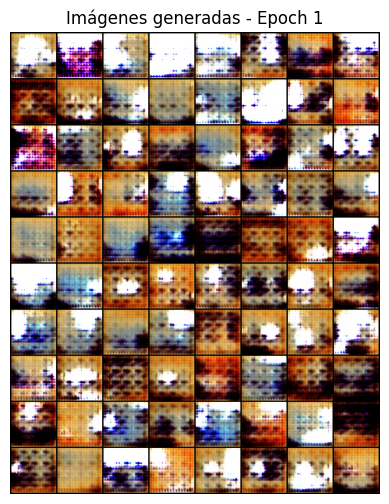

Epoch 2/50 completado
Epoch 3/50 completado
Epoch 4/50 completado
Epoch 5/50 completado
Epoch 6/50 completado


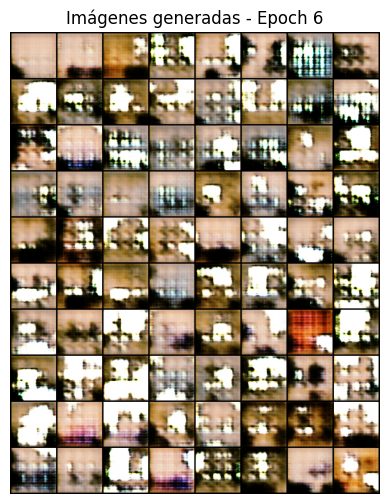

Epoch 7/50 completado
Epoch 8/50 completado
Epoch 9/50 completado
Epoch 10/50 completado
Epoch 11/50 completado


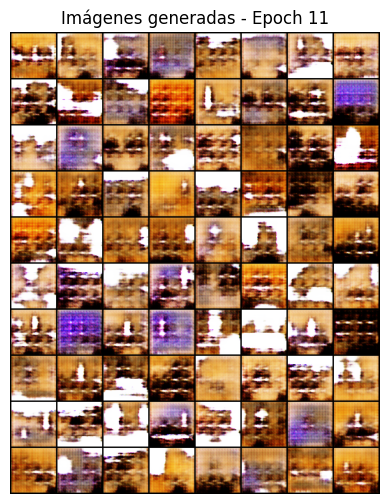

Epoch 12/50 completado
Epoch 13/50 completado
Epoch 14/50 completado
Epoch 15/50 completado
Epoch 16/50 completado


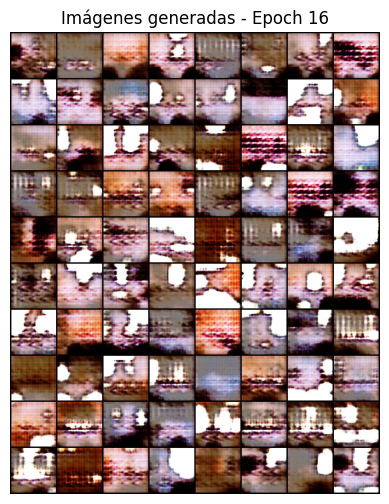

Epoch 17/50 completado
Epoch 18/50 completado
Epoch 19/50 completado
Epoch 20/50 completado
Epoch 21/50 completado


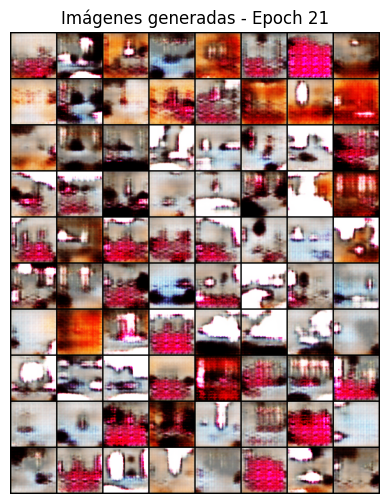

Epoch 22/50 completado
Epoch 23/50 completado
Epoch 24/50 completado
Epoch 25/50 completado
Epoch 26/50 completado


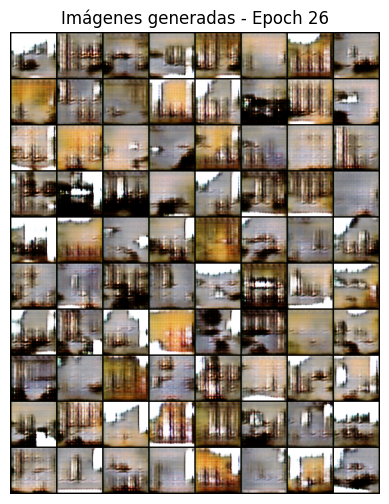

Epoch 27/50 completado
Epoch 28/50 completado
Epoch 29/50 completado
Epoch 30/50 completado
Epoch 31/50 completado


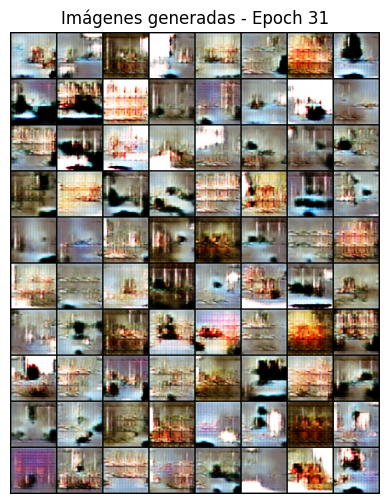

Epoch 32/50 completado
Epoch 33/50 completado
Epoch 34/50 completado
Epoch 35/50 completado
Epoch 36/50 completado


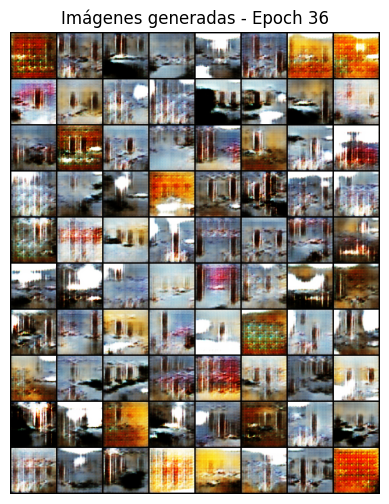

Epoch 37/50 completado
Epoch 38/50 completado
Epoch 39/50 completado
Epoch 40/50 completado
Epoch 41/50 completado


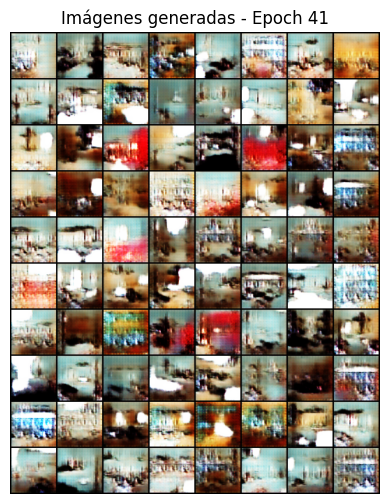

Epoch 42/50 completado
Epoch 43/50 completado
Epoch 44/50 completado
Epoch 45/50 completado
Epoch 46/50 completado


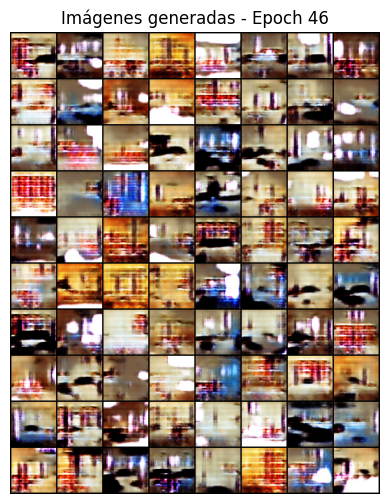

Epoch 47/50 completado
Epoch 48/50 completado
Epoch 49/50 completado
Epoch 50/50 completado


In [19]:
# Entrenamiento (20 epochs mínimo)
import torchvision
num_epochs = 50

real_label = 1.
fake_label = 0.

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):

        # =====================
        # ENTRENAR DISCRIMINADOR
        # =====================
        netD.zero_grad()

        real_images = data[0].to(device)
        b_size = real_images.size(0)

        label = torch.full((b_size,), real_label, device=device)

        output = netD(real_images).view(-1)
        lossD_real = criterion(output, label)
        lossD_real.backward()

        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake_images = netG(noise)

        label.fill_(fake_label)
        output = netD(fake_images.detach()).view(-1)
        lossD_fake = criterion(output, label)
        lossD_fake.backward()

        optimizerD.step()

        # =====================
        # ENTRENAR GENERADOR
        # =====================
        netG.zero_grad()
        label.fill_(real_label)

        output = netD(fake_images).view(-1)
        lossG = criterion(output, label)
        lossG.backward()

        optimizerG.step()

    print(f"Epoch {epoch+1}/{num_epochs} completado")

    if epoch % 5 == 0:
        with torch.no_grad():
            fake = netG(noise).detach().cpu()
            fake = fake * 0.5 + 0.5

        plt.figure(figsize=(6,6))
        plt.axis("off")
        plt.title(f"Imágenes generadas - Epoch {epoch+1}")
        plt.imshow(
            torchvision.utils.make_grid(fake, padding=2)
            .permute(1,2,0)
        )
        plt.show()


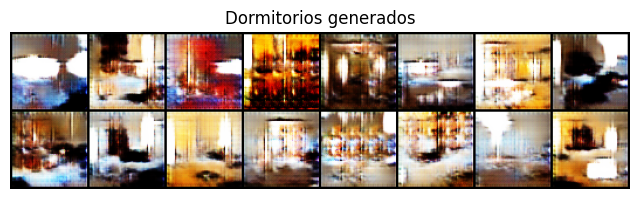

In [20]:
# Generación de resultados
import torchvision
import matplotlib.pyplot as plt

noise = torch.randn(16, nz, 1, 1, device=device)

with torch.no_grad():
    fake = netG(noise).detach().cpu()

# Desnormalizar de [-1,1] a [0,1]
fake = fake * 0.5 + 0.5

plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Dormitorios generados")

plt.imshow(
    torchvision.utils.make_grid(fake, padding=2)
    .permute(1,2,0)
)

plt.show()
